In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [109]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [110]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
"dimension of diabetes data: {}".format(diabetes.shape)

'dimension of diabetes data: (768, 9)'

In [112]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

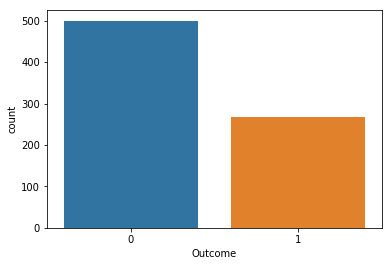

In [113]:
import seaborn as sns

sns.countplot(diabetes['Outcome'],label="Count");

In [114]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [115]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [116]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [117]:
diabetes.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

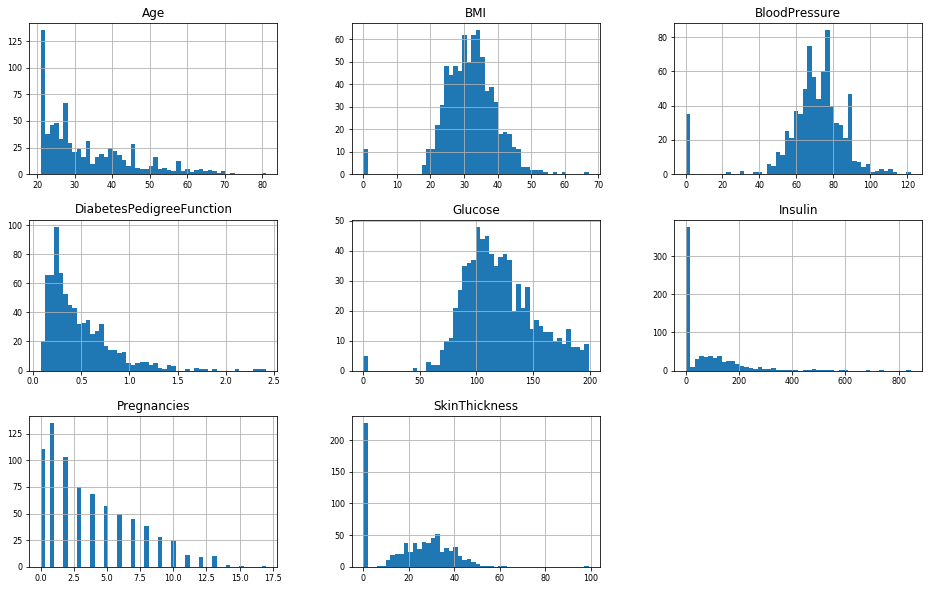

In [118]:
diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [119]:
diabetes=diabetes[diabetes['Pregnancies']<=11]

In [120]:
diabetes=diabetes[diabetes['BMI']>=12]

In [121]:
diabetes=diabetes[diabetes['BloodPressure']>40]

In [122]:
diabetes=diabetes[diabetes['Glucose']>40]

In [123]:
diabetes=diabetes[diabetes['SkinThickness']<60]

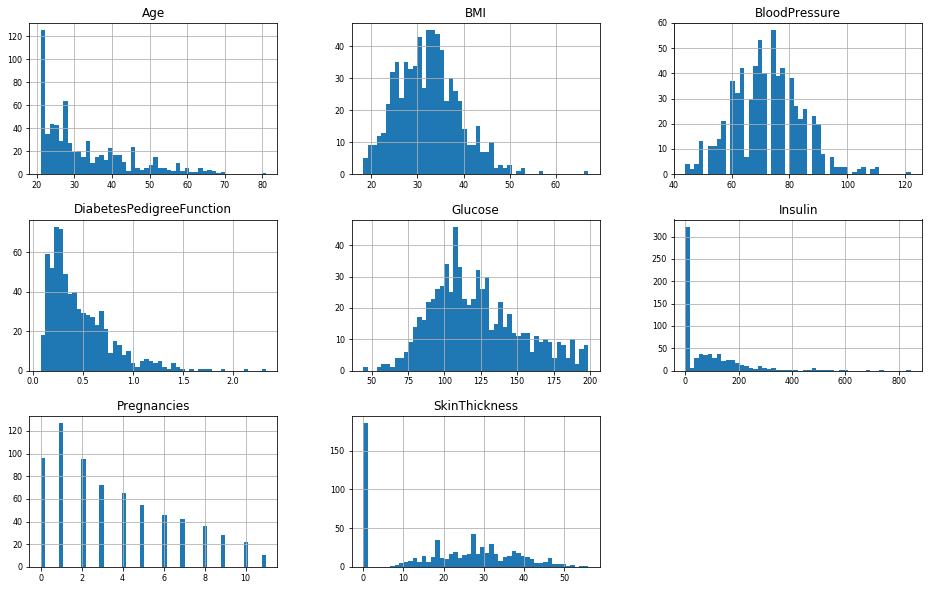

In [124]:
diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

Text(0.5, 1.0, 'Correlation between different fearures')

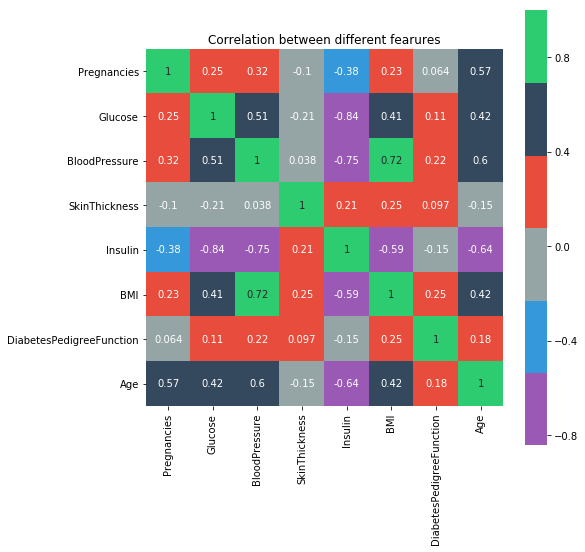

In [125]:
normalized_application = Normalizer().fit_transform(diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']])
#print (normalized_application)

normal_df=pd.DataFrame(normalized_application)
normal_df.columns=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

cor=normal_df.corr()
plt.figure(figsize=(8,8))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.heatmap(cor, vmax=1, square=True,annot=True,cmap=flatui)
plt.title('Correlation between different fearures')

In [126]:
from mlxtend.feature_selection import SequentialFeatureSelector as s

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
backmodel=s(RandomForestRegressor(),k_features=5,forward=False,verbose=2,cv=5,n_jobs=-1,scoring="r2")

In [137]:
backmodel.fit(np.array(X_train),y_train)

C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LENOVO\Anaconda3\Ne

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
             floating=False, forward=False, k_features=5, n_jobs=-1,
             pre_dispatch='2*n_jobs', scoring='r2', verbose=2)

In [138]:
X_train,X_test,y_train,y_test=train_test_split(diabetes.drop('Outcome',axis=1),diabetes['Outcome'],test_size=0.2)

In [139]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as s

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
model=s(RandomForestRegressor(),min_features=1,max_features=5,scoring='r2',n_jobs=-1)

In [142]:
mindata=X_train[X_train.columns[list(backmodel.k_feature_idx_)]]

In [159]:
mindata

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
610,3,106,30.9,0.292,24
198,4,109,34.8,0.905,26
730,3,130,28.4,0.323,34
132,3,170,34.5,0.356,30
617,2,68,20.1,0.257,23
733,2,106,29.0,0.426,22
496,5,110,26.0,0.292,30
30,5,109,36.0,0.546,60
258,1,193,25.9,0.655,24
170,6,102,30.8,0.180,36


In [145]:
backmodel.k_feature_names_

('0', '1', '5', '6', '7')

In [146]:
model.fit(mindata,y_train)

Features: 31/31

ExhaustiveFeatureSelector(clone_estimator=True, cv=5,
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
             max_features=5, min_features=1, n_jobs=-1,
             pre_dispatch='2*n_jobs', print_progress=True, scoring='r2')

In [147]:
backmodel.k_feature_names_

('0', '1', '5', '6', '7')

### k-Nearest Neighbors


In [148]:

X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

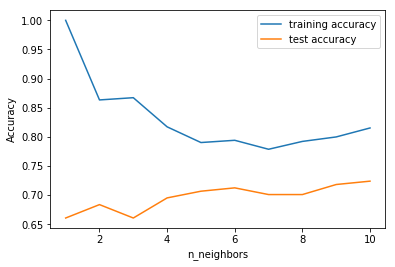

In [149]:

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [150]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

'Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train))


'Accuracy of K-NN classifier on training set: 0.80'

In [151]:
'Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test))

'Accuracy of K-NN classifier on test set: 0.72'

# Support Vector Machine

In [152]:

svc = SVC()
svc.fit(X_train, y_train)

"Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train))


C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'Accuracy on training set: 1.00'

In [153]:
"Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test))

'Accuracy on test set: 0.67'

In [154]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

"Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train))


C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'Accuracy on training set: 0.79'

In [155]:
"Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test))

'Accuracy on test set: 0.72'

In [156]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

"Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train))


C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'Accuracy on training set: 0.817'

In [157]:
"Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test))

'Accuracy on test set: 0.736'

# logisticRegression

In [172]:
from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
logmodel.fit(x_train,y_train)

C:\Users\LENOVO\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [173]:
prediction = logmodel.predict(x_test);


array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [174]:
from sklearn.metrics import confusion_matrix 

In [175]:
confusion_matrix(y_test,prediction)

array([[102,  14],
       [ 36,  22]], dtype=int64)

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7126436781609196

In [177]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.74      0.88      0.80       116\n           1       0.61      0.38      0.47        58\n\n   micro avg       0.71      0.71      0.71       174\n   macro avg       0.68      0.63      0.64       174\nweighted avg       0.70      0.71      0.69       174\n'

#we have already applied all the algorythem like KNN ,Logistic ,Support Vector Machine now we are comparing accuracy and fscore from them 

In [182]:
data_comparision={"Algo_name":["KNN ","SVM","Logistic"],"Accuracy":[0.81,0.76,0.74]}
accuracy_com=pd.DataFrame(data_comparision);accuracy_com

,Algo_name,Accuracy
0,KNN,0.81
1,SVM,0.76
2,Logistic,0.74


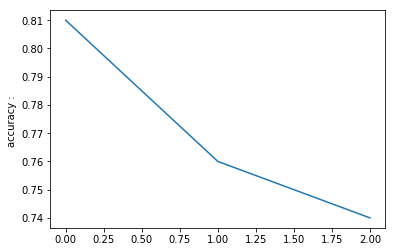

In [185]:
plt.plot([0.81,0.76,0.74])
plt.ylabel("accuracy : ")
plt.show()